# Deep Learnig Praticals


### ANN Pratical Implementation

In [1]:
### Using Tenserflow library  for DeepLearnig pratical implementation

In [2]:
import tensorflow as tf   ## In this version we have keras integrated
print(tf.__version__)


2.14.0


In [3]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
# Importing the dataset
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [5]:
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [6]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [7]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [8]:
#Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [9]:
geography

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


from matplotlib import pyplot as plt
geography['Germany'].plot(kind='hist', bins=20, title='Germany')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
geography['Spain'].plot(kind='hist', bins=20, title='Spain')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
geography.plot(kind='scatter', x='Germany', y='Spain', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
geography['Germany'].plot(kind='line', figsize=(8, 4), title='Germany')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
geography['Spain'].plot(kind='line', figsize=(8, 4), title='Spain')
plt.gca().spines[['top', 'right']].set_visible(False)

In [10]:
gender

,Male
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


from matplotlib import pyplot as plt
gender['Male'].plot(kind='hist', bins=20, title='Male')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
gender['Male'].plot(kind='line', figsize=(8, 4), title='Male')
plt.gca().spines[['top', 'right']].set_visible(False)

In [11]:
## Concatenate the Data Frames

X=pd.concat([X,geography,gender],axis=1)

## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [12]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### Part 2 - Now let's make the ANN



In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout

In [17]:
# Initialising the ANN
classifier = Sequential()

In [15]:
X.shape

(10000, 11)

In [21]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=11,activation='relu'))

In [22]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=7,activation='relu'))

In [23]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=6,activation='relu'))

In [24]:
# Adding the output layer
classifier.add(Dense(units=1,activation='sigmoid'))

In [26]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [33]:
## Early Stopping
import tensorflow as tf

earlystopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.1,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [34]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=100,callbacks=earlystopping)

Epoch 1/100
536/536 [==============================] - 4s 7ms/step - loss: 0.5056 - accuracy: 0.7962 - val_loss: 0.5065 - val_accuracy: 0.7955
Epoch 2/100
536/536 [==============================] - 4s 8ms/step - loss: 0.5057 - accuracy: 0.7962 - val_loss: 0.5065 - val_accuracy: 0.7955
Epoch 3/100
536/536 [==============================] - 3s 5ms/step - loss: 0.5056 - accuracy: 0.7962 - val_loss: 0.5065 - val_accuracy: 0.7955
Epoch 4/100
536/536 [==============================] - 3s 6ms/step - loss: 0.5056 - accuracy: 0.7962 - val_loss: 0.5065 - val_accuracy: 0.7955
Epoch 5/100
536/536 [==============================] - 3s 6ms/step - loss: 0.5056 - accuracy: 0.7962 - val_loss: 0.5065 - val_accuracy: 0.7955
Epoch 6/100
536/536 [==============================] - 4s 8ms/step - loss: 0.5056 - accuracy: 0.7962 - val_loss: 0.5065 - val_accuracy: 0.7955
Epoch 7/100
536/536 [==============================] - 4s 7ms/step - loss: 0.5056 - accuracy: 0.7962 - val_loss: 0.5065 - val_accuracy: 0.7955

In [35]:
# list all data in history
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


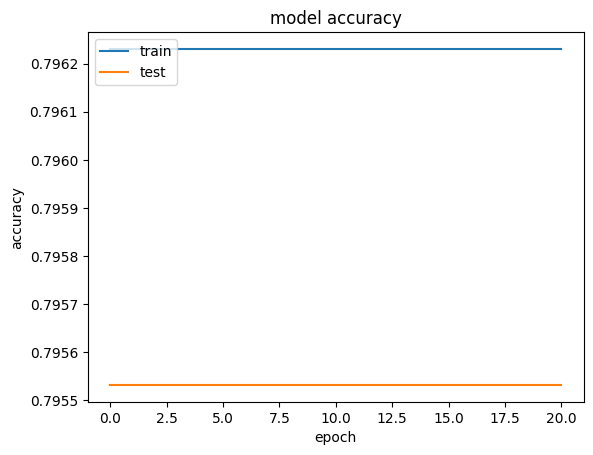

In [36]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

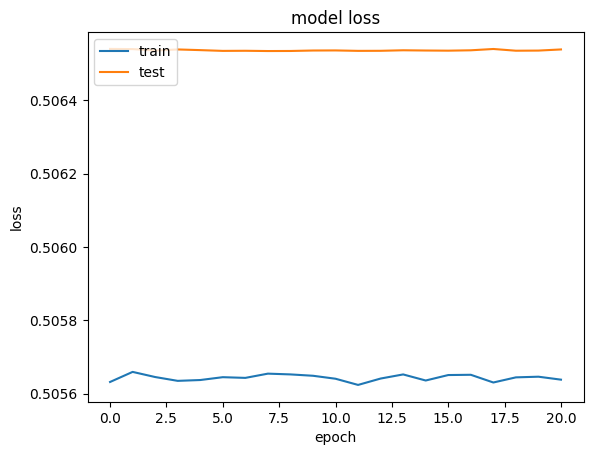

In [37]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Part 3 - Making the predictions and evaluating the model

In [38]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 [==============================] - 0s 2ms/step


In [39]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1595,    0],
       [ 405,    0]])

In [40]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [41]:
score

0.7975

In [42]:
## Get the weights

classifier.get_weights()

[array([[-0.22278321,  0.46595407, -0.06201845,  0.23966688,  0.45814043,
          0.17506683,  0.15748978,  0.48845226,  0.09618229,  0.13251764,
         -0.48391548],
        [ 0.30585515,  0.51270515, -0.20713502,  0.07902193, -0.43071708,
         -0.45897353, -0.36205453, -0.05281094,  0.24781036,  0.38478595,
          0.40660906],
        [ 0.25717127, -0.4127896 , -0.46013245,  0.00721061,  0.2506392 ,
         -0.3409339 , -0.43003714,  0.19453812, -0.52024454,  0.40606606,
         -0.12011695],
        [ 0.34627098,  0.3946463 ,  0.51156574, -0.47150406,  0.48903972,
          0.11181116,  0.27490163,  0.28833038, -0.18653408,  0.04954755,
          0.26810223],
        [ 0.49961108, -0.27061832,  0.4080183 ,  0.22458398,  0.50962585,
          0.44016176, -0.4651131 , -0.25894216, -0.3259024 , -0.11302349,
          0.3711064 ],
        [-0.16307366, -0.0327546 ,  0.32880497,  0.44732308, -0.03935575,
          0.29931194, -0.38153547,  0.18490887, -0.4734255 , -0.3009945